## ******************************LIBRARY IMPORTAION***************

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential,Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense,Flatten,Dropout,SimpleRNN,LSTM,Input,Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from miceforest import ImputationKernel
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

## ******DATA SET IMPORTATION AND PREPROCESSING FOR FIRST DATASET******

In [2]:
df_als=pd.read_csv('data/train2-alsfrs.csv')
df_sensor=pd.read_csv('data/train2-sensor.csv')
df_static=pd.read_csv('data/train2-static.csv')


In [3]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})
df_als=df_als.drop('source',axis=1)
df_sensor=df_sensor.dropna()
merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')
df=merged_df
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape
df1=df.drop([187,188],axis=0)
df1
df=df1
first_=df.iloc[:,:2]
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

Epoch 1/100
187/187 [==============================] - 2s 3ms/step - loss: 1.5944
Epoch 2/100
187/187 [==============================] - 1s 5ms/step - loss: 1.3846
Epoch 3/100
187/187 [==============================] - 1s 3ms/step - loss: 1.2242
Epoch 4/100
187/187 [==============================] - 1s 4ms/step - loss: 1.0990
Epoch 5/100
187/187 [==============================] - 0s 2ms/step - loss: 1.0060
Epoch 6/100
187/187 [==============================] - 1s 4ms/step - loss: 0.9227
Epoch 7/100
187/187 [==============================] - 1s 3ms/step - loss: 0.8589
Epoch 8/100
187/187 [==============================] - 1s 5ms/step - loss: 0.8037
Epoch 9/100
187/187 [==============================] - 0s 3ms/step - loss: 0.7554
Epoch 10/100
187/187 [==============================] - 1s 4ms/step - loss: 0.7146
Epoch 11/100
187/187 [==============================] - 0s 3ms/step - loss: 0.6789
Epoch 12/100
187/187 [==============================] - 1s 4ms/step - loss: 0.6488
Epoch 13/100


In [4]:
df = pd.concat([first_,imputed_df, y], axis=1)
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')
merged=merged_df.dropna(subset='Q1')
merged
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,beat_to_beat_HTI,beat_to_beat_IALS,...,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
47,8.0,1631.0,50.098586,0.504301,0.495699,0.504289,0.495711,50.104065,13.077500,0.333582,...,47.0,24.0,1639.25,142.0,1.0,5.776299,58.832470,70.979820,57.066742,20.295679
123,248.0,1766.0,50.712582,0.490730,0.509270,0.490447,0.509553,50.631210,8.708197,0.335146,...,420.0,1450.0,2014.25,3162.0,1.0,2.323750,51.404644,87.197731,85.901039,28.125298
194,393.0,1766.0,50.076650,0.497943,0.502057,0.497971,0.502029,50.081903,21.020000,0.333333,...,1524.0,1482.0,2159.25,3685.0,1.0,2.323750,51.404644,87.197731,85.901039,28.125298
285,69.0,1711.0,50.313692,0.486101,0.513899,0.486165,0.513835,50.285924,12.168342,0.333830,...,16.0,88.0,1780.25,104.0,1.0,19.718140,45.528667,42.423195,64.479645,21.169443
408,29.0,1711.0,50.240456,0.478673,0.521327,0.478634,0.521366,50.207117,10.567308,0.333563,...,0.0,20.0,1740.25,20.0,1.0,19.718140,45.528667,42.423195,64.479645,21.169443


In [5]:
df = pd.concat([first_,imputed_df, y], axis=1)
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')
merged=merged_df.dropna(subset='Q1')
merged
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()
first_=merged.iloc[:,:2]
y=merged.iloc[:,98:]
df = pd.concat([first_,m_data, y], axis=1)
first_df=df
first_df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,fd228ba0,993,8.0,1631.0,50.098586,0.504301,0.495699,0.504289,0.495711,50.104065,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,c53a1583,87,248.0,1766.0,50.712582,0.490730,0.509270,0.490447,0.509553,50.631210,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,c53a1583,266,393.0,1766.0,50.076650,0.497943,0.502057,0.497971,0.502029,50.081903,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,fbeebbbb,775,69.0,1711.0,50.313692,0.486101,0.513899,0.486165,0.513835,50.285924,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,fbeebbbb,929,29.0,1711.0,50.240456,0.478673,0.521327,0.478634,0.521366,50.207117,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9c810836,8663,534.0,1726.0,49.872089,0.501280,0.498719,0.502324,0.498560,49.904959,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
7034,9c810836,8782,442.0,1726.0,49.904962,0.501281,0.499613,0.501440,0.499513,49.919656,...,4.0,3.0,3.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0
7035,df4c99f5,8658,165.0,1576.0,50.278142,0.492010,0.508999,0.491649,0.509095,50.228331,...,4.0,3.0,1.0,1.0,1.0,2.0,0.0,4.0,4.0,4.0
7036,9cb5cd37,97,272.0,1711.0,50.098586,0.504934,0.493298,0.505752,0.493340,50.081903,...,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0


## ******DATA SET IMPORTATION AND PREPROCESSING FOR SECOND DATASET******

In [6]:
df_als=pd.read_csv('data/train-alsfrs.csv')
df_sensor=pd.read_csv('data/train-sensor.csv')
df_static=pd.read_csv('data/train-static.csv')

In [7]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})


In [8]:
df_als=df_als.drop('source',axis=1)

In [9]:
df_sensor.duplicated().sum()

0

## ***************DATA PREPROCESSING AND EXPLORATION***************

In [10]:
df_sensor=df_sensor.dropna()

In [11]:
merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')
merged_df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,M,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,M,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,M,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,M,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,M,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,c0d49276,M,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,M,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
299,c0d49276,M,1.038356,46.0,NaN,NaN,NaN,186.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0
300,479620e5,NaN,NaN,NaN,NaN,NaN,NaN,913.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,1.0,1.0,4.0,4.0,2.0


## LABEL ENCODING CATEGORICAL DATA

In [12]:
df=merged_df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape

(302, 20)

In [13]:
df.columns.get_loc('Q1')

8

## Removing inappropriate Gender

In [14]:
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
299,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,186.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0
300,479620e5,2,NaN,NaN,NaN,NaN,NaN,913.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,1.0,1.0,4.0,4.0,2.0


In [15]:
df1=df.drop([300,301],axis=0)
df1

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,0.167123,44.0,85.0,62.0,23.918830,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [16]:
df=df1

In [17]:
first_=df.iloc[:,:2]
first_

,id,sex
0,fd228ba0,1
1,fd228ba0,1
2,fd228ba0,1
3,fd228ba0,1
4,fd228ba0,1
...,...,...
295,5f4c8750,0
296,c0d49276,1
297,c0d49276,1
298,c0d49276,1


## Handling missing values using Autoencoders

In [18]:
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

Epoch 1/100


300/300 [==============================] - 2s 2ms/step - loss: 1.4479
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 1.1806
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 1.0515
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.9719
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 0.9158
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8745
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 0.8416
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8131
Epoch 9/100
300/300 [==============================] - 1s 3ms/step - loss: 0.7858
Epoch 10/100
300/300 [==============================] - 1s 2ms/step - loss: 0.7587
Epoch 11/100
300/300 [==============================] - 1s 3ms/step - loss: 0.7237
Epoch 12/100
300/300 [==============================] - 1s 2ms/step - loss: 0.6927
Epoch 13/100
300/300 [===

In [19]:
df = pd.concat([first_,imputed_df, y], axis=1)
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.435370,67.524826,71.872742,55.775280,20.554174,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.435370,67.524826,71.872742,55.775280,20.554174,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.435370,67.524826,71.872742,55.775280,20.554174,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.435370,67.524826,71.872742,55.775280,20.554174,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.435370,67.524826,71.872742,55.775280,20.554174,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,1.742685,43.700188,84.026245,66.507301,23.267782,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,1.352865,46.364117,86.145729,73.127907,25.072287,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,1.352865,46.364117,86.145729,73.127907,25.072287,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.352865,46.364117,86.145729,73.127907,25.072287,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [20]:
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')

In [21]:
merged_df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,803.0,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fd228ba0,804.0,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fd228ba0,829.0,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
3,fd228ba0,832.0,110.0,1631.0,49.889215,0.470498,0.529502,0.470705,0.529295,49.890583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fd228ba0,845.0,745.0,1631.0,49.853449,0.492547,0.507453,0.492588,0.507412,49.828971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [22]:
merged=merged_df.dropna(subset='Q1')
merged

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
2,fd228ba0,829.0,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
9,fd228ba0,863.0,542.0,1631.0,49.392646,0.488480,0.511520,0.488487,0.511513,49.343856,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
37,fd228ba0,941.0,98.0,1631.0,49.981590,0.494000,0.506000,0.493998,0.506002,49.979293,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
50,fd228ba0,1007.0,19.0,1631.0,49.970202,0.493233,0.506767,0.493385,0.506615,49.975954,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
87,fd228ba0,1252.0,2.0,1626.0,49.502554,0.496053,0.503947,0.496091,0.503909,49.471023,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [23]:
print(merged.columns.get_loc('Q1'))

98


## ***************MISSING VALUES HANDLING USING MULTIPLE IMPORTATION***************

In [24]:
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,beat_to_beat_HTI,beat_to_beat_IALS,...,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
2,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,9.777589,0.333333,...,11.0,29.0,1662.25,40.0,1.0,2.43537,67.524826,71.872742,55.77528,20.554174
9,542.0,1631.0,49.392646,0.488480,0.511520,0.488487,0.511513,49.343856,11.729124,0.333333,...,0.0,74.0,2173.25,339.0,1.0,2.43537,67.524826,71.872742,55.77528,20.554174
37,98.0,1631.0,49.981590,0.494000,0.506000,0.493998,0.506002,49.979293,14.856000,0.333571,...,39.0,13.0,1729.25,278.0,1.0,2.43537,67.524826,71.872742,55.77528,20.554174
50,19.0,1631.0,49.970202,0.493233,0.506767,0.493385,0.506615,49.975954,21.814394,0.333333,...,23.0,7.0,1650.25,54.0,1.0,2.43537,67.524826,71.872742,55.77528,20.554174
87,2.0,1626.0,49.502554,0.496053,0.503947,0.496091,0.503909,49.471023,16.195804,0.333604,...,32.0,15.0,1628.25,136.0,1.0,2.43537,67.524826,71.872742,55.77528,20.554174


In [25]:
first_=merged.iloc[:,:2]
y=merged.iloc[:,98:]
df = pd.concat([first_,m_data, y], axis=1)


In [26]:
second_df=df
df=pd.concat([first_df,second_df])
df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,fd228ba0,993.0,8.0,1631.0,50.098586,0.504301,0.495699,0.504289,0.495711,50.104065,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,c53a1583,87.0,248.0,1766.0,50.712582,0.490730,0.509270,0.490447,0.509553,50.631210,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,c53a1583,266.0,393.0,1766.0,50.076650,0.497943,0.502057,0.497971,0.502029,50.081903,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,fbeebbbb,775.0,69.0,1711.0,50.313692,0.486101,0.513899,0.486165,0.513835,50.285924,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,fbeebbbb,929.0,29.0,1711.0,50.240456,0.478673,0.521327,0.478634,0.521366,50.207117,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,151.0,1525.0,49.782566,0.499646,0.500354,0.499826,0.500287,49.793392,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,112.0,1465.0,49.973755,0.495347,0.504716,0.495465,0.504613,49.970247,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,843.0,1736.0,49.999925,0.492563,0.507437,0.492273,0.507361,49.981531,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,98.0,1721.0,49.726295,0.498760,0.501898,0.498862,0.501409,49.743902,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [27]:
df=df.drop(['id'],axis=1)

# Data Samples creation

In [28]:
def bootstrap_sample(sample, n_samples=None):
    if n_samples is None:
        n_samples = len(sample)
    indices = np.random.choice(len(sample), size=n_samples, replace=True)
    return sample[indices]
df2=df
s=df2.columns
df2=np.array(df2)
df2 = bootstrap_sample(df2, n_samples=1000)
df2=pd.DataFrame(df2,columns=s)
df=pd.concat([df,df2])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 47 to 999
Columns: 109 entries, days to Q12
dtypes: float64(109)
memory usage: 1.2 MB


In [30]:
df.isnull().sum().max()

0

## ******************************DATA SPLITTING***************

In [31]:
x1 = df.iloc[:,:97]
y = df.iloc[:,97:]

In [32]:
x1.shape

(1486, 97)

## ***************FEATURE SELECTION***************

['age_at_diagnosis', 'days', 'total_steps', 'FVC', 'weight', 'diagnostic_delay', 'basal_calories', 'bmi', 'total_calories', 'respiration_SampEn']


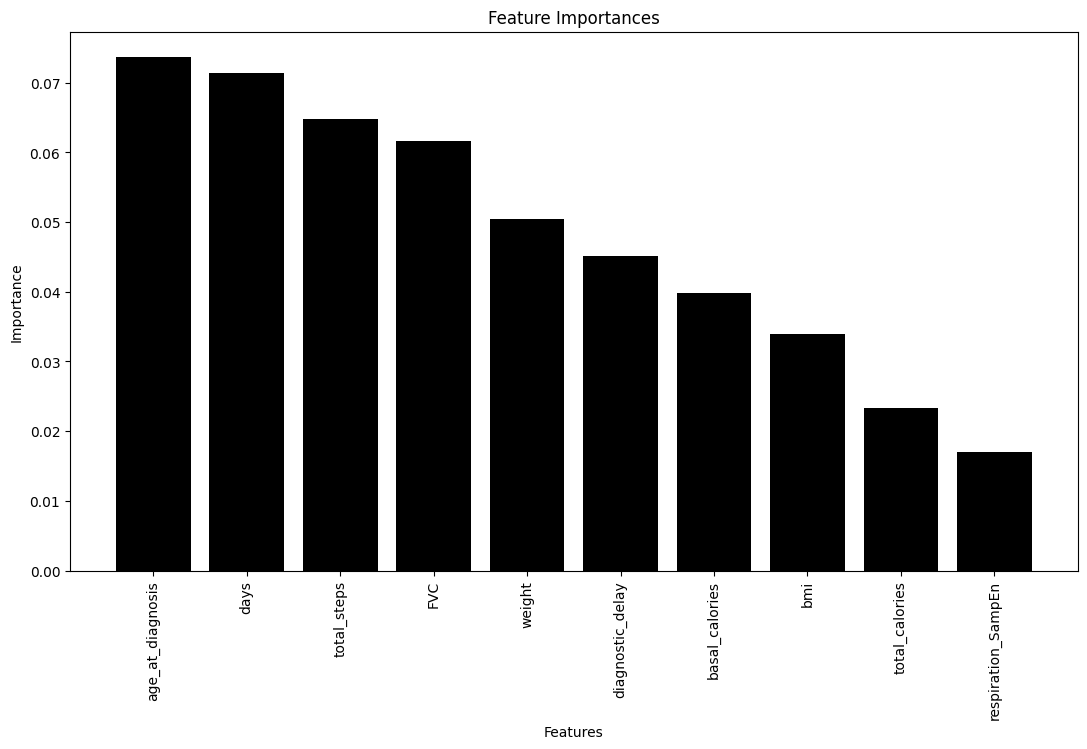

In [33]:
rf = RandomForestRegressor()
rf.fit(x1,y)
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': x1.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
ifs=importance_df['Feature'][:10]
selected_columns = list(ifs)
print(selected_columns)

plt.figure(figsize=(13,7))
plt.bar(ifs, importance_df['Importance'][:10], color='black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [34]:
x=x1[['total_steps', 'age_at_diagnosis', 'basal_calories', 'days', 'weight', 'diagnostic_delay', 'bmi', 'FVC', 'total_calories', 'steps_6_am-12_pm']]

In [35]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
sc = StandardScaler()
x = sc.fit_transform(x)

## ***************SPLITTING INTO TRAINING AND TESTING /MODEL DEVELOPMENT**************

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.1,random_state=42)

## ENSEMBLE MODELS

In [37]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)
rf_pred=np.round((np.clip(rf_pred,0,4))).astype(int)
print('MAE for RandomForest:',mean_absolute_error(rf_pred,y_test))
print('RMSE for RandomForest:',np.sqrt(mean_squared_error(rf_pred,y_test)))
print('R-sqaured value for RandomForest:',r2_score(rf_pred,y_test))

MAE for RandomForest: 0.03411633109619686
RMSE for RandomForest: 0.18770961437512745
R-sqaured value for RandomForest: 0.9664223052246218


In [38]:
bg_model=BaggingRegressor(estimator=DecisionTreeRegressor())
bg_model.fit(x_train,y_train)
bg_pred=bg_model.predict(x_test)
bg_pred=np.round((np.clip(bg_pred,0,4))).astype(int)
print('MAE for Bagging Model:',mean_absolute_error(bg_pred,y_test))
print('RMSE for Bagging Model:',np.sqrt(mean_squared_error(bg_pred,y_test)))
print('R-sqaured value for Bagging Model:',r2_score(bg_pred,y_test))

MAE for Bagging Model: 0.04697986577181209
RMSE for Bagging Model: 0.22683504734158885
R-sqaured value for Bagging Model: 0.9400258406823752


In [39]:
xg_model=XGBRegressor()
xg_model.fit(x_train,y_train)
xg_pred=xg_model.predict(x_test)
xg_pred=np.round((np.clip(xg_pred,0,4))).astype(int)
print('MAE for xgboost:',mean_absolute_error(xg_pred,y_test))
print('RMSE for xgboost:',np.sqrt(mean_squared_error(xg_pred,y_test)))
print('R-sqaured value for xgboost:',r2_score(xg_pred,y_test))

MAE for xgboost: 0.02069351230425056
RMSE for xgboost: 0.15142869202887194
R-sqaured value for xgboost: 0.9770518007590278


In [40]:
model_names=['RandomForest','Bagging Algorithm','XgBoost']
mae_values=[mean_absolute_error(rf_pred,y_test),mean_absolute_error(bg_pred,y_test),mean_absolute_error(xg_pred,y_test)]
rmse_values=[np.sqrt(mean_squared_error(rf_pred,y_test)),np.sqrt(mean_squared_error(bg_pred,y_test)),np.sqrt(mean_squared_error(xg_pred,y_test))]
r2_values=[r2_score(rf_pred,y_test),r2_score(bg_pred,y_test),r2_score(xg_pred,y_test)]
model_scores=pd.DataFrame()
model_scores['Model']=model_names
model_scores['MAE']=mae_values
model_scores['RMSE']=rmse_values
model_scores['R2 score']=r2_values
model_scores

,Model,MAE,RMSE,R2 score
0,RandomForest,0.034116,0.187710,0.966422
1,Bagging Algorithm,0.046980,0.226835,0.940026
2,XgBoost,0.020694,0.151429,0.977052
